# Dynamic Programming and Reinforcement Learning

## 1. Dynamic Programming

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Question 1:

**Implement the discrete MDP model**

In this model, we need several transition matrices, not like a Markov Chain.

s = [ p(s_i | s, aj) ]_{i,j}

Les actions en colonnes, les états à t+1 en ligne.

In [2]:
class MDP():
    
    
    def __init__(self):      
        
        # ----------------------------------------------
        # State 0 Transitions
        s_0 = np.array([[0.55, 0.3, 1],
                         [0.45, 0.7, 0],
                         [0.00, 0.0, 0]])

        # State 0 Transitions
        s_1 = np.array([[ 1, 0., 0],
                         [0., 0.4, 1],
                         [0., 0.6, 0]])

        # State 0 Transitions
        s_2 = np.array([[0., 0.0, 0],
                         [1,  0.6, 0],
                         [0., 0.4, 1]])

        # Global MDP
        MDP = np.array([s_0, s_1, s_2])
        
        # Rewards
        self.rewards = {}
        self.rewards[(0, 2)] = 0.05
        self.rewards[(2, 2)] = 0.9
        
        # ----------------------------------------------
        
        # Class properties
        self.states = [0, 1, 2]
        self.actions = [0, 1, 2]
        self.transition_tensor = MDP
        self.number_states = len(MDP)
        
    def get_number_states(self):
        return len(self.transition_tensor)
    
    def get_proba_next_state(self, initial_state):
        return self.transition_tensor[initial_state]
    
    def get_proba_state_action(self, initial_state, action):
        return self.transition_tensor[initial_state][:, action]
    
    def check_valid_transition_mat(self):
        for action_ in self.actions:
            for state_ in self.states:
                if np.sum(self.get_proba_state_action(state_, action_))!=1:
                    return False
        return True
    
    def get_reward(self, initial_state, action):
        try:
            return self.rewards[(initial_state, action)]
        except:
            return 0

In [3]:
mdp = MDP()
T = mdp.transition_tensor
n = mdp.get_number_states()

In [4]:
mdp.get_proba_state_action(initial_state=0, action=0)

array([0.55, 0.45, 0.  ])

In [5]:
mdp.check_valid_transition_mat()

True

In [6]:
mdp.get_reward(0, 2)

0.05

In [7]:
mdp.rewards

{(0, 2): 0.05, (2, 2): 0.9}

In this simple case, there are only two action-states with a non-zero reward: (s0, a2) and (s2, a2).
Since the reward is greater in (s2, a2), the optimal policy is to go to s2 and repeat a2 which is an absorbing action state.

Therefore, the optimal policy in s0 is to go toward s2. We choose the transition with the greater certainty which is (s0, a1), if we are in s0 again try harder, otherwise, we are in s1, go to s2 with the higher probability (s1, a1) is therefore the right decision rule in s1. Then if we stay in s1, try again and finally come to s2 and stay there in an absorbing state-action.

The optimal policy is therefore stationnary and reads [a1, a1, a2].

### Question 2:

### Implement and run value iteration (VI) in order to identify a 0.01-optimal policy

Using the Bellman equation we have:
$$V^*(t,x)=max_{a \in A}[r(x,a) + \gamma*\sum_{y} p(y|x,a)V(t+1,y)]$$

In [8]:
def value_iteration(value_state, state):
    """
        Compute the value iteration starting from the list of state values
        Input:
            value_state : <list> List of state values
            state: <int> Initial state at t
    """
    return np.max([mdp.get_reward(state, action) + gamma*(mdp.get_proba_state_action(initial_state=state, action=action) @ value_state) for action in [0, 1, 2]])

In [9]:
# learning rate
gamma = 0.95

# initial delta 
from math import inf
delta = inf

# initial value state function
value_state = np.zeros(3)

# initialization of values evolution
sequence_value_state = value_state
sequence_delta = []

while delta > 0.01:
    
    # compute the updated value state function
    updated_value_state = np.zeros(3)
    for state in [0, 1, 2]:
        updated_value_state[state] = value_iteration(value_state, state)

    # compute the delta between the two state
    delta = np.max(updated_value_state - value_state)
    
    # update value state array
    value_state = updated_value_state
    
    # store values evolution
    sequence_value_state = np.vstack([sequence_value_state, value_state])
    sequence_delta.append(delta)

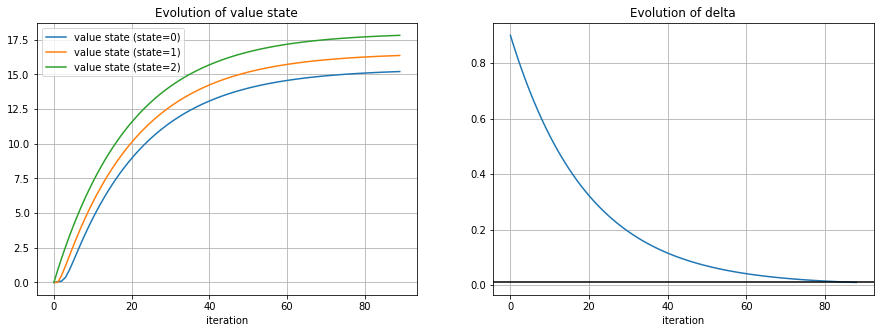

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title('Evolution of value state')
for state_ in [0, 1, 2]:
    plt.plot(sequence_value_state[:, state_], label='value state (state={})'.format(state_))
plt.xlabel('iteration')
plt.legend()
plt.grid()

plt.subplot(122)
plt.title('Evolution of delta')
plt.plot(sequence_delta)
plt.axhline(0.01, color='k')
plt.xlabel('iteration')
plt.grid()

plt.show()

In [11]:
# Value state obtained by value iteration
vstate_by_VI = value_state

In [12]:
print(vstate_by_VI)

[15.20379874 16.36102861 17.81264151]


**Implement policy evaluation to compute $v^*$, the value function of the optimal policy**

L'ordre de préférence des états est: V(s2)>V(s1)>V(s0) où la state-value function est obtenue de manière approchée à 0.01 epsilon prêt. Cette value function nous permet d'affirmer que la policy optimale est [a1, a1, a2].

**Direct computation**

Dans la suite on choisit cette policy, la nouvelle matrice de transition P en suivant cette policy est:

In [13]:
policy = [1,1,2]
reward = np.matrix([0, 0, 0.9])

P = np.zeros((3, 3))
for i in range(3):
    P[i] = mdp.get_proba_state_action(i, policy[i])
P = np.matrix(P)

In [14]:
P

matrix([[0.3, 0.7, 0. ],
        [0. , 0.4, 0.6],
        [0. , 0. , 1. ]])

In [15]:
# Direct computation
vstate_by_PE =  np.linalg.inv(np.identity(3) - gamma*P)@reward.T

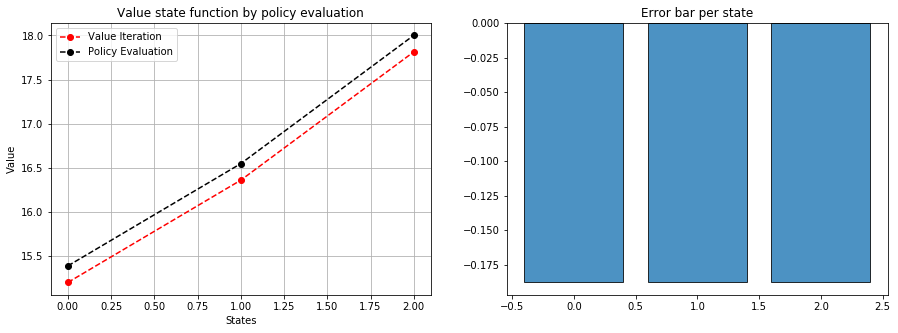

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Value state function by policy evaluation')
plt.plot(vstate_by_VI, 'ro--', label='Value Iteration')
plt.plot(vstate_by_PE, 'ko--', label='Policy Evaluation')
plt.grid()
plt.ylabel('Value')
plt.xlabel('States')
plt.legend()

plt.subplot(122)
plt.title('Error bar per state')
plt.bar([0,1,2], vstate_by_VI - np.array(vstate_by_PE.T).ravel(), edgecolor='k', alpha=0.8)
plt.show()

**Iterative policy evaluation**

In [17]:
policy = [1,1,2]
reward = np.matrix([0, 0, 0.9]).T

P = np.zeros((3, 3))
for i in range(3):
    P[i] = mdp.get_proba_state_action(i, policy[i])
P = np.matrix(P)

In [18]:
vstate_by_IPE = np.zeros(3)
vstate_by_IPE = np.matrix(vstate_by_IPE).T

sequence_value_state_IPE = vstate_by_IPE
sequence_delta = []

delta = inf

while delta > 0.01:
    vstate_by_IPE = reward + gamma* P @ vstate_by_IPE
    sequence_value_state_IPE = np.hstack([sequence_value_state_IPE, vstate_by_IPE])
    
    delta = np.max(sequence_value_state_IPE[:,-1] - sequence_value_state_IPE[:,-2])
    sequence_delta.append(delta)

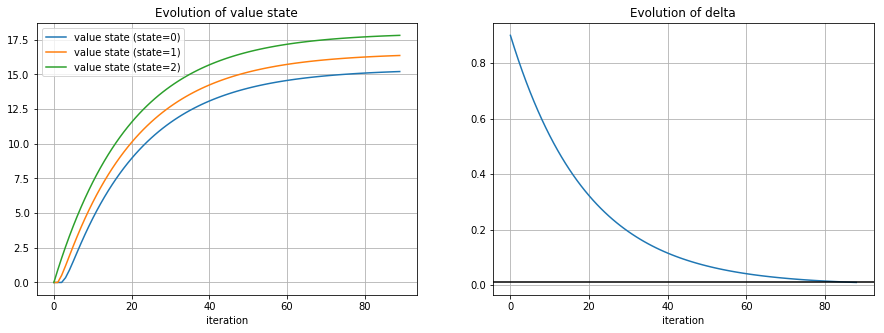

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title('Evolution of value state')
for state_ in [0, 1, 2]:
    plt.plot(np.array(sequence_value_state_IPE[state_,:]).ravel(), label='value state (state={})'.format(state_))
plt.xlabel('iteration')
plt.legend()
plt.grid()

plt.subplot(122)
plt.title('Evolution of delta')
plt.plot(sequence_delta)
plt.axhline(0.01, color='k')
plt.xlabel('iteration')
plt.grid()

plt.show()

### Question 3:

**Exact policy iteration (PI)**

In [20]:
def policy_evaluation(policy):
    """
        Compute the value state function for the given policy by direct computation
        
        Input:
            policy: <list> : List of decision rule for each states, ex: [1, 1, 2]
    """
    
    # Build reward given the policy
    reward = [0]*3
    for state_, action_ in enumerate(policy):
        reward[state_] = mdp.get_reward(initial_state=state_, action=action_)
    reward = np.matrix(reward).T

    # Build transition matrix given the policy
    P = np.zeros((3, 3))
    for i in range(3):
        P[i] = mdp.get_proba_state_action(i, policy[i])
    P = np.matrix(P)
    
    # Compute value state function
    vstate_by_PE =  np.linalg.inv(np.identity(3) - gamma*P)@reward
    
    return vstate_by_PE

In [21]:
initial_policy = [1, 1, 2]

policy_old = initial_policy
vstate_by_PE_old = policy_evaluation(policy_old) 

exit_condition = 0

while exit_condition != 1:

    policy_new = [0]*3
    for state_ in range(3):
        policy_new[state_] = np.argmax([float(mdp.get_reward(state_, action_) + gamma * mdp.get_proba_state_action(state_, action_) @ vstate_by_PE_old) for action_ in [0, 1, 2]])
    vstate_by_PE_new = policy_evaluation(policy_new)
    
    exit_condition = np.mean(np.array(vstate_by_PE_new) == np.array(vstate_by_PE_old))
    print(exit_condition)
    
    policy_old = policy_new
    vstate_by_PE_old = vstate_by_PE_new

1.0


## 2. Reinforcement Learning

In [22]:
from gridworld import GridWorld1
import gridrender as gui

### 2.1 A Review of RL Agent/Environment Interaction

### 2.2 Work to do

### Question 4.

**Agent/Environment interaction**

In [23]:
env = GridWorld1

In [24]:
env.action_names

array(['right', 'down', 'left', 'up'], dtype='<U5')

In [25]:
env.coord2state

array([[ 0,  1,  2,  3],
       [ 4, -1,  5,  6],
       [ 7,  8,  9, 10]])

In [26]:
env.proba_succ

0.9

In [27]:
env.state_actions

[[0, 1],
 [0, 2],
 [0, 1, 2],
 [0],
 [1, 3],
 [0, 1, 3],
 [0],
 [0, 3],
 [0, 2],
 [0, 2, 3],
 [2, 3]]

In [28]:
help(env.reset)

Help on method reset in module gridworld:

reset() method of gridworld.GridWorld instance
    Returns:
        An initial state randomly drawn from
        the initial distribution



In [29]:
help(env.step)

Help on method step in module gridworld:

step(state, action) method of gridworld.GridWorld instance
    Args:
        state (int): the amount of good
        action (int): the action to be executed
    
    Returns:
        next_state (int): the state reached by performing the action
        reward (float): a scalar value representing the immediate reward
        absorb (boolean): True if the next_state is absorsing, False otherwise



In [30]:
# Go right being in state 0: Go to 1, no reward and not a terminal state
env.step(0, 0)

(1, 0.0, False)

In [31]:
# Go right being in state 0: Go to 1, reward=1 and terminal state
env.step(2, 0)

(3, 1, True)

In [32]:
################################################################################
# Work to do: Q4
################################################################################
# here the v-function and q-function to be used for question 4
v_q4 = [0.87691855, 0.92820033, 0.98817903, 0.00000000, 0.67106071, -0.99447514, 0.00000000, -0.82847001, -0.87691855,
        -0.93358351, -0.99447514]

**Deterministic policy: Select the action *right* when available otherwise *up*.**

In [33]:
def check_valid_action(initial_state, action):
    """
        Check in the environment if the action "action" is allowed at state "state"
    """
    available_actions = env.state_actions[initial_state]
    return (action in available_actions)

print(check_valid_action(0, 1))
print(check_valid_action(0, 3))

True
False


In [34]:
def right_up_policy(initial_state):
    """
        Return the action following the right/up policy
        
        # right
        env.action_names[0]
        # up
        env.action_names[3]
    """
    if check_valid_action(initial_state=initial_state, action=0):
        return 0
    else:
        return 3

In [35]:
# generate one trajectory
initial_state = env.reset()
print(initial_state)
t = 0
Tmax = 50
term = (initial_state in [3, 6])

current_state = initial_state

while t < Tmax and not term:
    action = right_up_policy(initial_state=current_state)
    next_state, reward, term = env.step(state=current_state, action=action)
    print('action={} - state={}'.format(action, next_state))
    current_state = next_state
    t+=1

6


In [36]:
def generate_trajectory(n):
    """
        Generate a number of E trajectories following the right-up policy
    """

    Seq_states  = []
    Seq_actions = []
    Seq_rewards = []
    
    for _ in range(n):
        
        # generate one trajectory
        initial_state = env.reset()

        t = 0
        Tmax = 50
        term = (initial_state in [3, 6])

        current_state = initial_state

        seq_actions = []
        seq_rewards = []
        seq_states  = [initial_state]
        
        while t < Tmax and not term:
            action = right_up_policy(initial_state=current_state)
            next_state, reward, term = env.step(state=current_state, action=action)
            current_state = next_state
            t+=1
            
            seq_actions.append(action)
            seq_rewards.append(reward)
            seq_states.append(current_state)
    
        Seq_states.append(seq_states)
        Seq_actions.append(seq_actions)
        Seq_rewards.append(seq_rewards)

    return Seq_states, Seq_actions, Seq_rewards

In [37]:
Seq_states, Seq_actions, Seq_rewards = generate_trajectory(100)

In [38]:
def discounted_sum(gamma, seq_rewards):
    if len(seq_rewards)==0:
        # terminal state at the beginning
        return 0
    else:
        seq_gamma = np.array([gamma**t for t in range(len(seq_rewards))])
        
        return np.sum(np.array(seq_rewards) * seq_gamma)

In [39]:
hash_table = {}
for initial_state in range(11):
    hash_table[initial_state] = []

In [40]:
for seq_states, seq_rewards in zip(Seq_states, Seq_rewards):
    hash_table[seq_states[0]].append(seq_rewards)

In [41]:
for state in range(11):
    hash_table[state] = np.mean([discounted_sum(0.95, sample_seq_rewards) for sample_seq_rewards in hash_table[state]])

In [42]:
hash_table

{0: 0.8790084558823529,
 1: 0.8911405347224608,
 2: 0.99025,
 3: 0.0,
 4: 0.49851533515624996,
 5: -1.0,
 6: 0.0,
 7: -0.8277720851611328,
 8: -0.869108126736111,
 9: -0.938421875,
 10: -0.9961538461538461}

In [43]:
value_state_by_PE_MC = list(hash_table.values())

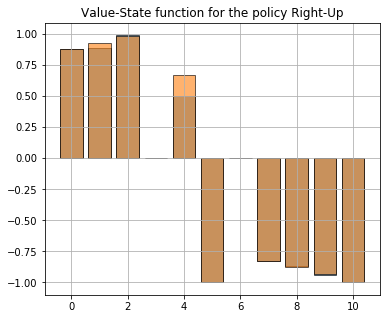

In [44]:
plt.figure(figsize=(6,5))
plt.title('Value-State function for the policy Right-Up')
plt.bar(range(11), value_state_by_PE_MC, edgecolor='k', alpha=0.6)
plt.bar(range(11), v_q4, edgecolor='k', alpha=0.6)
plt.grid()
plt.show()

In [45]:
def vstate_right_up_by_MC(n):
    
    Seq_states, Seq_actions, Seq_rewards = generate_trajectory(n)
    
    hash_table = {}
    for initial_state in range(11):
        hash_table[initial_state] = []
    
    for seq_states, seq_rewards in zip(Seq_states, Seq_rewards):
        hash_table[seq_states[0]].append(seq_rewards)
        
    for state in range(11):
        hash_table[state] = np.mean([discounted_sum(0.95, sample_seq_rewards) for sample_seq_rewards in hash_table[state]])
    
    value_state_by_PE_MC = list(hash_table.values())
    
    return value_state_by_PE_MC

In [46]:
vstate_right_up_by_MC(50)

[0.83553675625,
 0.95,
 0.9587791666666666,
 0.0,
 0.8406561874999998,
 -0.9916666666666667,
 0.0,
 -0.8573749999999999,
 -0.9025,
 -0.95,
 -1.0]

In [47]:
# Density estimation of mu_0
dist_init_states = [env.reset() for i in range(10000)]

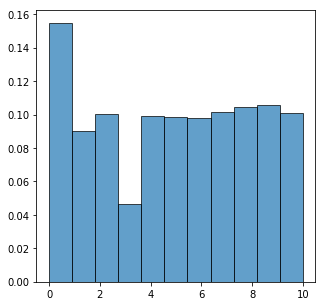

In [48]:
plt.figure(figsize=(5,5))
mu_0 = plt.hist(dist_init_states, bins=11, edgecolor='k', alpha=0.7, normed=True)[0]
plt.show()

In [49]:
print(mu_0)

[0.15477 0.08998 0.10021 0.04642 0.09911 0.09834 0.09801 0.10164 0.10472
 0.10571 0.10109]


In [50]:
# Compute Jpolicy
Jpolicy = np.array(mu_0)@np.array(vstate_right_up_by_MC(n=100))
# Compute Jn
Jn = np.array(mu_0)@np.array(v_q4)

In [51]:
y = [Jn - np.array(mu_0)@np.array(vstate_right_up_by_MC(n)) for n in range(10, 1000)]

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [52]:
import pandas as pd

In [53]:
y_serie = pd.Series(y)

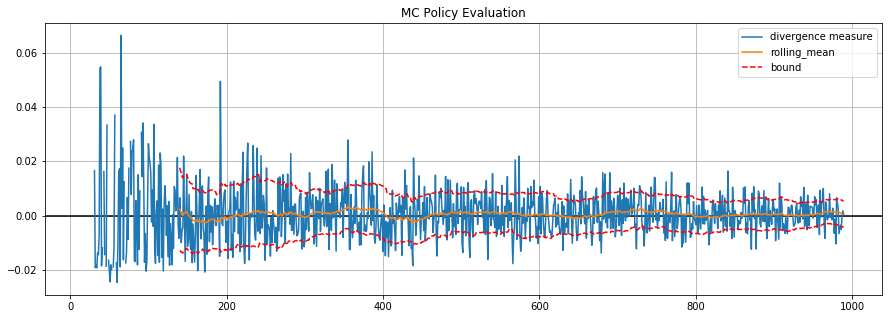

In [54]:
y_rolling_mean = y_serie.rolling(50).mean()
y_rolling_std = y_serie.rolling(50).std()

plt.figure(figsize=(15,5))
plt.title('MC Policy Evaluation')
plt.axhline(0, color='k')
plt.plot(y, label='divergence measure')
plt.plot(y_rolling_mean, label='rolling_mean')
plt.plot(y_rolling_mean + y_rolling_std, 'r--', label='bound')
plt.plot(y_rolling_mean - y_rolling_std, 'r--')

plt.legend()
plt.grid()
plt.show()

**Policy optimization: the Q-learning algorithm**

### Question 5:

In [59]:
import random

In [60]:
def shuffle_list(input_list):
    index = list(range(len(input_list)))
    random_values = [np.random.random() for i in index]
    index = sorted(index, key=lambda i: random_values[i])
    output_list = []
    for i in index:
        output_list.append(input_list[i])
    return output_list

In [61]:
class Q_learning():
    
    def __init__(self, env):
        self.Q = {}
        self.N = {}
        # step power (Robbins Monro conditions)
        self.alpha = 1
        # exploration coefficient
        self.epsilon = 0.4
        
        for state, actions in enumerate(env.state_actions):
            for action in actions:
                self.Q[(state, action)] = 0
                self.N[(state, action)] = 0

    def get_N(self, state, action):
        return self.N[(state, action)]

    def update_N(self, state, action):
        self.N[(state, action)] += 1
    
    def get_Q(self, state, action):
        return self.Q[(state, action)]
    
    def get_max_Q(self, state):
        available_actions = env.state_actions[state]
        available_actions = shuffle_list(available_actions)
        qlist = [self.get_Q(state, action) for action in available_actions]
        return available_actions[np.argmax(qlist)]
    
    def update_Q(self, state, action, value):
        self.Q[(state, action)] = value
    
    def get_step(self, state, action):
        return 1/self.N[(state, action)]**self.alpha
    
    def epsilon_greedy_policy(self, initial_state):
        available_actions = env.state_actions[initial_state]
        nbr_available_actions = len(available_actions)
        max_action = self.get_max_Q(initial_state)
        
        if random.random()<(1-self.epsilon) or nbr_available_actions==1:
            return max_action
        else:
            return np.random.choice(list(set(available_actions)-set([max_action])))
    
    def reset_N(self):
        for state, actions in enumerate(env.state_actions):
            for action in actions:
                self.N[(state, action)] = 0
    
    def qvalues(self):
        qvalues = []
        for state, actions in enumerate(env.state_actions):
            for action in actions:
                qvalues.append(qlearning.get_Q(state=state, action=action))
        return qvalues

In [62]:
def sample_trajectory(qlearning, Tmax=50):
    
    initial_state = np.random.choice(range(11))

    t = 0
    term = (initial_state in [3, 6])

    current_state = initial_state

    seq_actions = []
    seq_rewards = []
    seq_states  = [initial_state]

    while t < Tmax and not term:
        action = qlearning.epsilon_greedy_policy(initial_state=current_state)
        next_state, reward, term = env.step(state=current_state, action=action)
        current_state = next_state
        t+=1

        seq_states.append(current_state)
        seq_actions.append(action)
        seq_rewards.append(reward)
        
    return seq_states, seq_actions, seq_rewards

In [93]:
v_opt = np.array([0.87691855, 0.92820033, 0.98817903, 0.00000000, 0.82369294, 0.92820033, 0.00000000, 0.77818504, 0.82369294,
         0.87691855, 0.82847001])

def value_state_by_Qlearn(qlearning):

    policy_by_Qlearn = np.zeros(11)
    for state in range(11):
        policy_by_Qlearn[state] = qlearning.get_Q(state=state, action=qlearning.get_max_Q(state=state))

    return policy_by_Qlearn

In [110]:
qlearning = Q_learning(env)
evolution_qvalues = np.array(qlearning.qvalues())

# Metrics
performance = []

for _ in range(4000):
    
    seq_states, seq_actions, seq_rewards = sample_trajectory(qlearning, Tmax=200)

    # Parcours des suites
    for i in range(len(seq_actions)):

        initial_state = seq_states[i]
        next_state = seq_states[i+1]
        action = seq_actions[i]
        reward = seq_rewards[i]

        qlearning.update_N(state=initial_state, action=action)

        # Qlearning update
        alpha_n = qlearning.get_step(initial_state, action)
        new_Q = (1-alpha_n)*qlearning.get_Q(initial_state, action) +\
                   alpha_n * (reward + gamma*qlearning.get_Q(next_state, qlearning.get_max_Q(next_state)))
        qlearning.update_Q(state=initial_state, action=action, value=new_Q)
    
    # Get update greedy value state for policy
    v_policy_n = value_state_by_Qlearn(qlearning)
    performance.append(np.max(np.abs(v_policy_n - v_opt)))
    evolution_qvalues = np.vstack([evolution_qvalues, np.array(qlearning.qvalues())])

In [111]:
qlearning.Q

{(0, 0): 0.8605922280818583,
 (0, 1): 0.7044948084082976,
 (1, 0): 0.9233791986658618,
 (1, 2): 0.8087371529415724,
 (2, 0): 0.9878806680439315,
 (2, 1): 0.8845076215807277,
 (2, 2): 0.880941148046268,
 (3, 0): 0,
 (4, 1): 0.6580835603562973,
 (4, 3): 0.7778646777658007,
 (5, 0): -0.7818481028837967,
 (5, 1): 0.8369746023167955,
 (5, 3): 0.927125111747336,
 (6, 0): 0,
 (7, 0): 0.737306352849388,
 (7, 3): 0.6820554382583792,
 (8, 0): 0.8094652438744977,
 (8, 2): 0.6703648420521702,
 (9, 0): 0.7584987860376942,
 (9, 2): 0.7459086383182318,
 (9, 3): 0.8742602635268024,
 (10, 2): 0.8194145696207297,
 (10, 3): -0.8224849790320999}

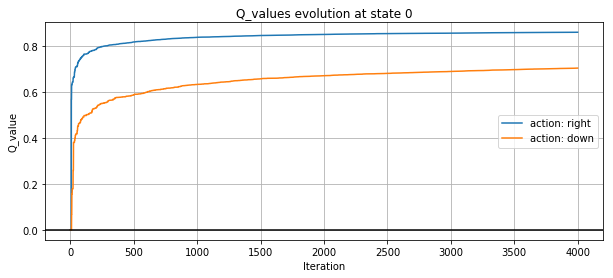

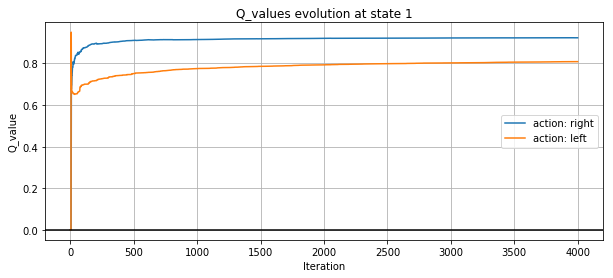

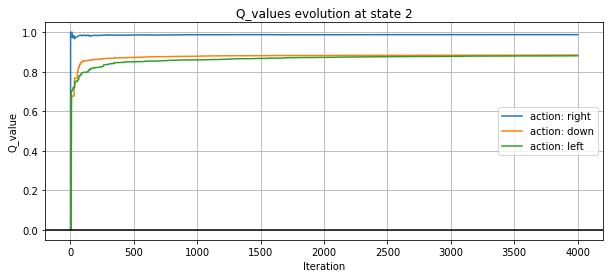

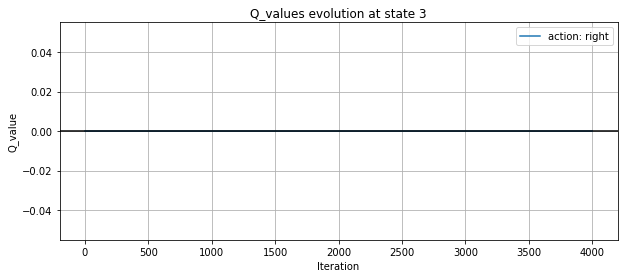

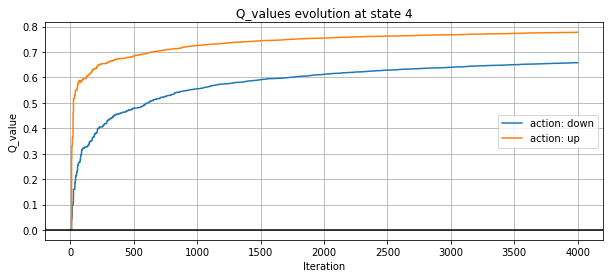

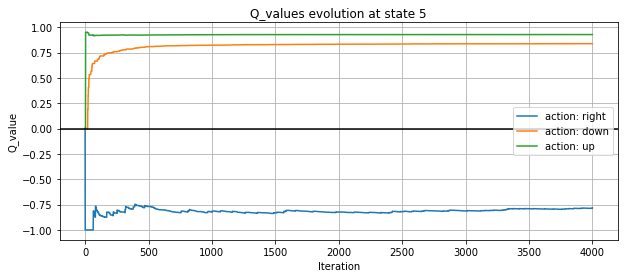

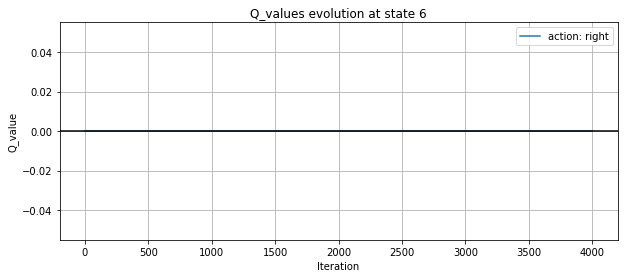

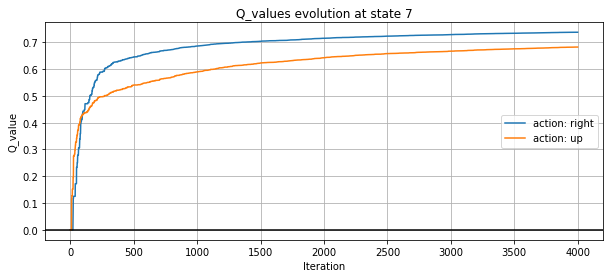

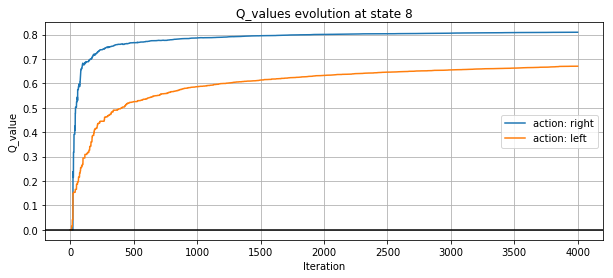

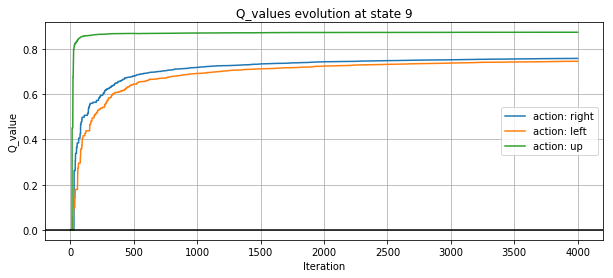

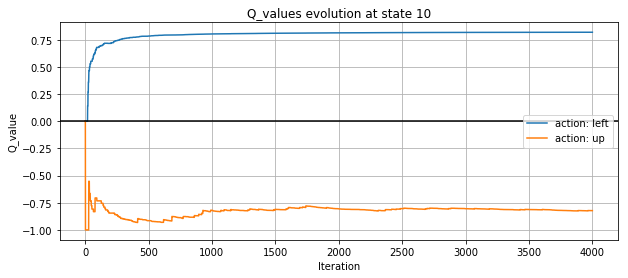

In [112]:
i = 0
for state, actions in enumerate(env.state_actions):
    plt.figure(figsize=(10,4))
    plt.title('Q_values evolution at state {}'.format(state))
    for action in actions:
        plt.plot(evolution_qvalues[:, i], label='action: {}'.format(env.action_names[action]))
        i+=1
    plt.legend()
    plt.grid()
    plt.axhline(0, color='k')
    plt.xlabel('Iteration')
    plt.ylabel('Q_value')
plt.show()

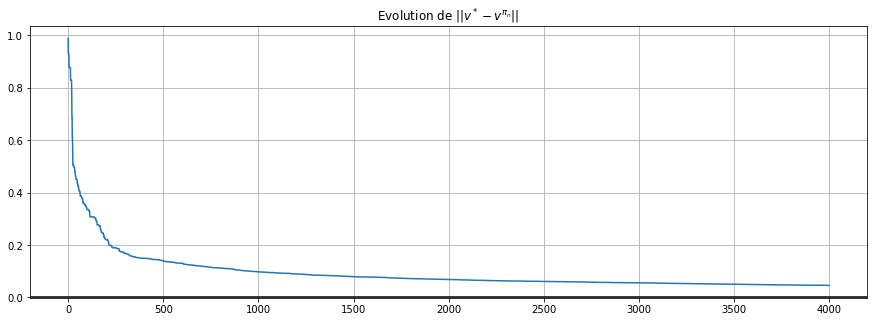

In [114]:
plt.figure(figsize=(15,5))
plt.title('Evolution de $||v^* - v^{\pi_n}||$')
plt.plot(performance)
plt.axhline(0, color='k')
plt.grid()
plt.show()